In [1]:
import pandas as pd
import numpy as np
import pickle 
import seaborn as sns
from matplotlib import pyplot as plt

### Loading Data

In [2]:
## load scraped hotel reviews data
test = pickle.load(open("../data/merged_hotel_data_withprice.pkl", "rb"))
test = test.reset_index(drop = True)
main_faci = pickle.load(open('../data/main_facilities_wide.pkl', 'rb'))
test = test.merge(main_faci, on = 'hotel_name_', how = 'left')
print(test.shape)
print(test.columns)
test.head()

(76536, 110)
Index(['hotel_name_', 'stars', 'location', 'review_rating', 'description',
       'main_facilities', 'total_reviews', 'sub_ratings',
       'sub_ratings_categories', 'sub_ratings_dict',
       ...
       '24 hour front desk', 'restaurant_y', 'bar_y', 'airport shuttle_y',
       'swimming pool', 'fitness room', 'coffee/tea maker', 'family rooms_y',
       'spa & wellness centre', 'rooms/facilities for disabled'],
      dtype='object', length=110)


hotel_name_  stars  \
0  RedDoorz near East Avenue Medical Center      2   
1  RedDoorz near East Avenue Medical Center      2   
2  RedDoorz near East Avenue Medical Center      2   
3  RedDoorz near East Avenue Medical Center      2   
4  RedDoorz near East Avenue Medical Center      2   

                                            location review_rating  \
0  90 Matatag Street, Quezon City, 1100 Manila, P...           6.0   
1  90 Matatag Street, Quezon City, 1100 Manila, P...           6.0   
2  90 Matatag Street, Quezon City, 1100 Manila, P...           6.0   
3  90 Matatag Street, Quezon City, 1100 Manila, P...           6.0   
4  90 Matatag Street, Quezon City, 1100 Manila, P...           6.0   

                                         description  \
0  RedDoorz near East Avenue Medical Center featu...   
1  RedDoorz near East Avenue Medical Center featu...   
2  RedDoorz near East Avenue Medical Center featu...   
3  RedDoorz near East Avenue Medical Center featu...   
4  RedDoorz near East Avenue Medical Center featu...   

                                     main_facilities total_reviews  \
0  [Non Smoking Rooms, Free WiFi Internet Access ...            88   
1  [Non Smoking Rooms, Free WiFi Internet Access ...            88   
2  [Non Smoking Rooms, Free WiFi Internet Access ...            88   
3  [Non Smoking Rooms, Free WiFi Internet Access ...            88   
4  [Non Smoking Rooms, Free WiFi Internet Access ...            88   

                           sub_ratings  \
0  [6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]   
1  [6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]   
2  [6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]   
3  [6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]   
4  [6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]   

                              sub_ratings_categories  \
0  [Staff, Facilities, Cleanliness, Comfort, Valu...   
1  [Staff, Facilities, Cleanliness, Comfort, Valu...   
2  [Staff, Facilities, Cleanliness, Comfort, Valu...   
3  [Staff, Facilities, Cleanliness, Comfort, Valu...   
4  [Staff, Facilities, Cleanliness, Comfort, Valu...   

                                    sub_ratings_dict  ... 24 hour front desk  \
0  {'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...  ...                  1   
1  {'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...  ...                  1   
2  {'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...  ...                  1   
3  {'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...  ...                  1   
4  {'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...  ...                  1   

  restaurant_y bar_y airport shuttle_y swimming pool  fitness room  \
0            0     0                 0             0             0   
1            0     0                 0             0             0   
2            0     0                 0             0             0   
3            0     0                 0             0             0   
4            0     0                 0             0             0   

  coffee/tea maker family rooms_y spa & wellness centre  \
0                0              1                     0   
1                0              1                     0   
2                0              1                     0   
3                0              1                     0   
4                0              1                     0   

  rooms/facilities for disabled  
0                             0  
1                             0  
2                             0  
3                             0  
4                             0  

[5 rows x 110 columns]

In [3]:
## drop columns
data = test.drop(['location', 'description', 'cheapest_price','main_facilities', 'sub_ratings', 'sub_ratings_categories', 'sub_ratings_dict',\
        'hotel_surroundings', 'hotel_surroundings_distance', 'surroundings_dict', 'room_type_x', 'price_list', 'room_price_dict',\
        'facilities_groups', 'all_facilities', 'link',\
        'name', 'date_reviewed', 'short_review', 'positive_review', 'negative_review'
        ], axis = 1)

## additional drop for columns that are found both in main_facilities and all_facilities
## decided to drop those that are found in all_facilities (suffix _x)
data = data.drop(['bar_x', 'restaurant_x', 'family rooms_x', 'airport shuttle_x', 'facilities for disabled guests', 'non-smoking rooms', 'room-service'], axis = 1)
data = data.rename(columns={'bar_y':'bar', 'restaurant_y' :'restaurant', 'family rooms_y': 'family rooms', 'airport shuttle_y': 'airport shuttle'})
print(data.columns)
data

Index(['hotel_name_', 'stars', 'review_rating', 'total_reviews',
       'facilities_count', 'air conditioning', 'fire extinguishers',
       'cctv in common areas', 'private bathroom', 'smoke alarms', 'toilet',
       'tv', '24-hour security', 'towels', 'free toiletries',
       '24-hour front desk', 'shower', 'toilet paper', 'elevator', 'linens',
       'security alarm', 'flat-screen tv', 'daily housekeeping',
       'cctv outside property', 'room service', 'designated smoking area',
       'safe', 'desk', 'bidet', 'smoke-free property', 'baggage storage',
       'cable channels', 'telephone', 'key card access', 'electric kettle',
       'meeting/banquet facilities', 'laundry', 'fax/photocopying',
       'upper floors accessible by elevator', 'wake-up service', 'concierge',
       'hairdryer', 'slippers', 'key access', 'accessible parking',
       'wardrobe or closet', 'clothes rack', 'socket near the bed',
       'ironing service', 'room_type', 'nights_stayed', 'month_stayed',
      

hotel_name_  stars review_rating  \
0      RedDoorz near East Avenue Medical Center      2           6.0   
1      RedDoorz near East Avenue Medical Center      2           6.0   
2      RedDoorz near East Avenue Medical Center      2           6.0   
3      RedDoorz near East Avenue Medical Center      2           6.0   
4      RedDoorz near East Avenue Medical Center      2           6.0   
...                                         ...    ...           ...   
76531                        88 Courtyard Hotel      3           7.5   
76532                        88 Courtyard Hotel      3           7.5   
76533                        88 Courtyard Hotel      3           7.5   
76534                        88 Courtyard Hotel      3           7.5   
76535                        88 Courtyard Hotel      3           7.5   

      total_reviews  facilities_count  air conditioning  fire extinguishers  \
0                88                22                 1                   1   
1                88                22                 1                   1   
2                88                22                 1                   1   
3                88                22                 1                   1   
4                88                22                 1                   1   
...             ...               ...               ...                 ...   
76531           173                54                 1                   1   
76532           173                54                 1                   1   
76533           173                54                 1                   1   
76534           173                54                 1                   1   
76535           173                54                 1                   1   

       cctv in common areas  private bathroom  smoke alarms  ...  \
0                         0                 0             1  ...   
1                         0                 0             1  ...   
2                         0                 0             1  ...   
3                         0                 0             1  ...   
4                         0                 0             1  ...   
...                     ...               ...           ...  ...   
76531                     1                 1             1  ...   
76532                     1                 1             1  ...   
76533                     1                 1             1  ...   
76534                     1                 1             1  ...   
76535                     1                 1             1  ...   

       24 hour front desk  restaurant  bar  airport shuttle  swimming pool  \
0                       1           0    0                0              0   
1                       1           0    0                0              0   
2                       1           0    0                0              0   
3                       1           0    0                0              0   
4                       1           0    0                0              0   
...                   ...         ...  ...              ...            ...   
76531                   0           0    0                1              0   
76532                   0           0    0                1              0   
76533                   0           0    0                1              0   
76534                   0           0    0                1              0   
76535                   0           0    0                1              0   

       fitness room  coffee/tea maker  family rooms  spa & wellness centre  \
0                 0                 0             1                      0   
1                 0                 0             1                      0   
2                 0                 0             1                      0   
3                 0                 0             1                      0   
4                 0                 0             1                      0   


### Data Prep

In [4]:
## check datatypes
print(data.info(verbose = True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76536 entries, 0 to 76535
Data columns (total 82 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   hotel_name_                          76536 non-null  object 
 1   stars                                76536 non-null  int64  
 2   review_rating                        76536 non-null  object 
 3   total_reviews                        76536 non-null  object 
 4   facilities_count                     76536 non-null  int64  
 5   air conditioning                     76536 non-null  int64  
 6   fire extinguishers                   76536 non-null  int64  
 7   cctv in common areas                 76536 non-null  int64  
 8   private bathroom                     76536 non-null  int64  
 9   smoke alarms                         76536 non-null  int64  
 10  toilet                               76536 non-null  int64  
 11  tv                          

In [5]:
data['review_score'] = data['review_score'].astype(float)

In [6]:
data['zip_code'] = data['zip_code'].astype(str)
data['city'] = pd.Categorical(data['city'])

In [7]:
## check datatypes
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76536 entries, 0 to 76535
Data columns (total 82 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   hotel_name_                          76536 non-null  object  
 1   stars                                76536 non-null  int64   
 2   review_rating                        76536 non-null  object  
 3   total_reviews                        76536 non-null  object  
 4   facilities_count                     76536 non-null  int64   
 5   air conditioning                     76536 non-null  int64   
 6   fire extinguishers                   76536 non-null  int64   
 7   cctv in common areas                 76536 non-null  int64   
 8   private bathroom                     76536 non-null  int64   
 9   smoke alarms                         76536 non-null  int64   
 10  toilet                               76536 non-null  int64   
 11  tv             

In [8]:
# check for NA values
print(data.isna().sum().to_string())

hotel_name_                                0
stars                                      0
review_rating                              0
total_reviews                              0
facilities_count                           0
air conditioning                           0
fire extinguishers                         0
cctv in common areas                       0
private bathroom                           0
smoke alarms                               0
toilet                                     0
tv                                         0
24-hour security                           0
towels                                     0
free toiletries                            0
24-hour front desk                         0
shower                                     0
toilet paper                               0
elevator                                   0
linens                                     0
security alarm                             0
flat-screen tv                             0
daily hous

In [9]:
#  check counts per hotel room type
data.groupby(['hotel_name_', 'room_type']).room_type.count()

hotel_name_         room_type          
88 Courtyard Hotel                         142
                    Deluxe Double Room      10
                    Deluxe Twin Room         7
                    Superior Twin Room      10
ACL Suites          Deluxe Suite             2
                                          ... 
iHotel Uptown BGC   Deluxe Queen Room       50
                    Deluxe Twin Room        56
                    Standard Queen Room     23
                    Standard Twin Room     122
广东大酒店                                        1
Name: room_type, Length: 1139, dtype: int64

<AxesSubplot: >

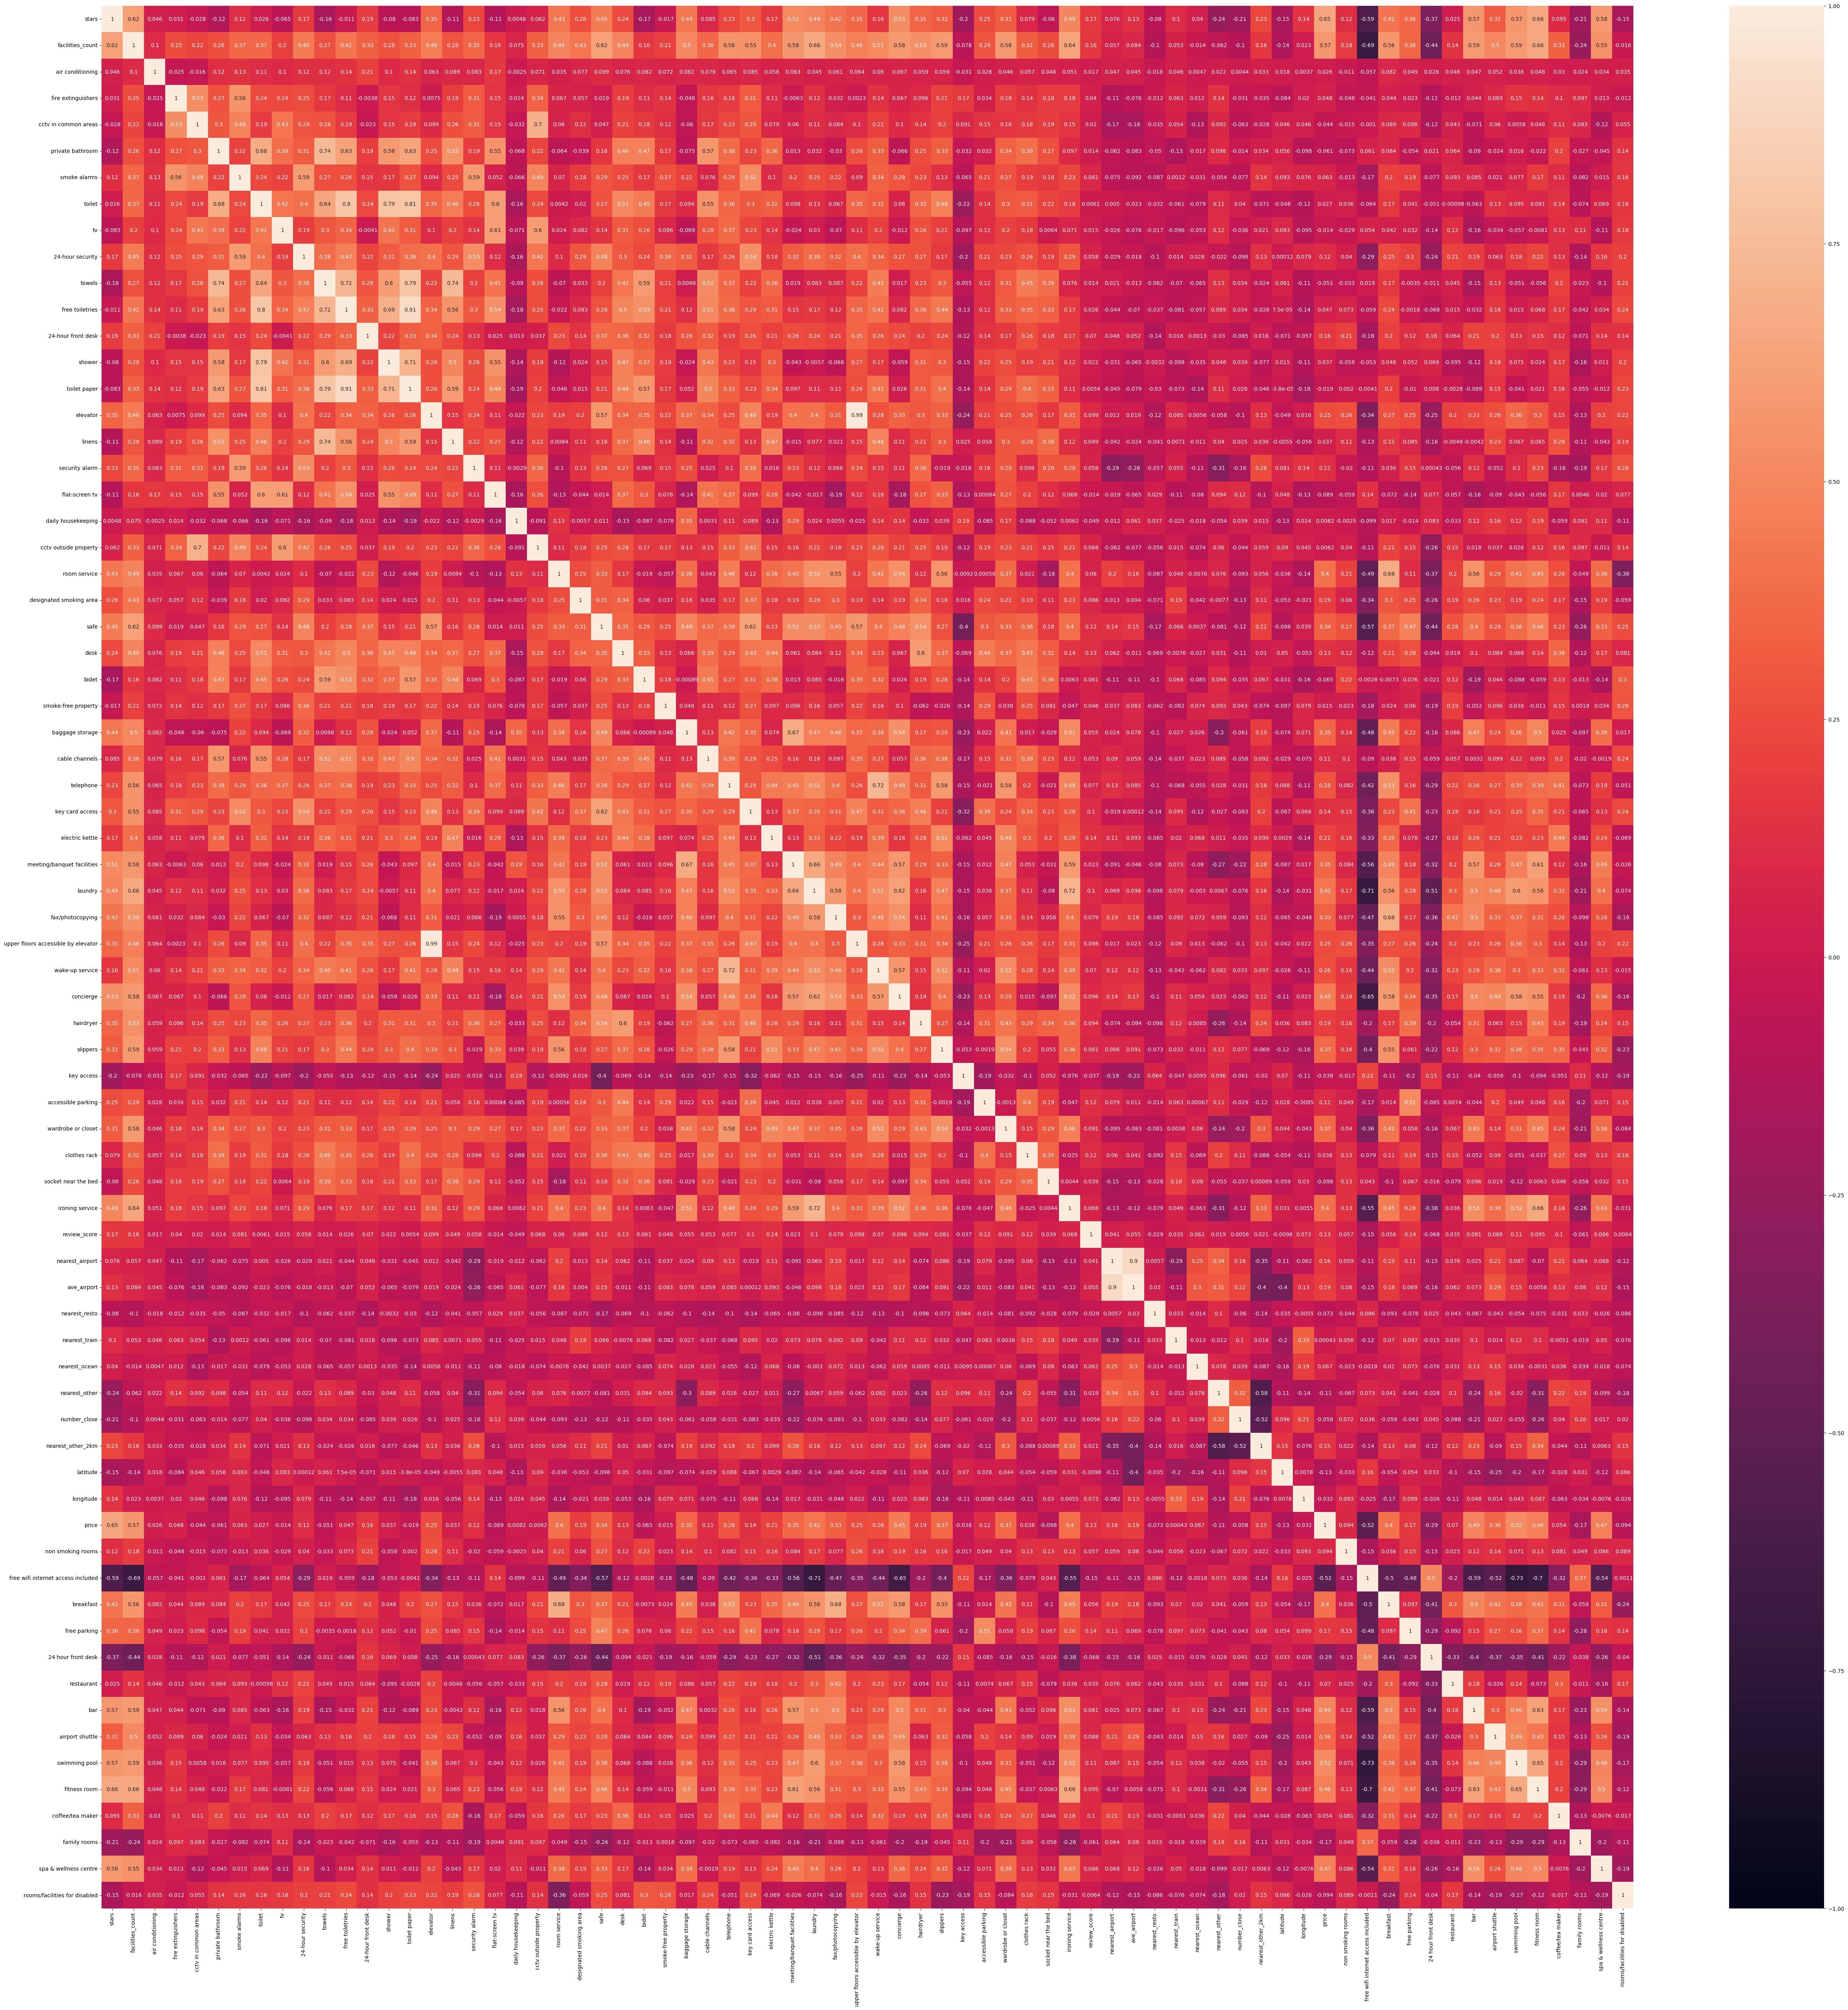

In [10]:
## heatmap to visualize correlations
plt.figure(figsize=(64, 64))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)

In [11]:
# short summary
data[['price', 'review_score', 'facilities_count']].describe()

price  review_score  facilities_count
count  57851.000000  76536.000000      76536.000000
mean    2870.307117      7.805375         51.642978
std     2551.590551      2.191925         26.167887
min      619.000000      1.000000          5.000000
25%     1425.000000      7.000000         35.000000
50%     2031.000000      8.000000         47.000000
75%     3055.000000     10.000000         64.000000
max    37050.000000     10.000000        159.000000

### Training

In [12]:
# drop NAs in price
mod_data = data[data['price'].notna()]
mod_data = mod_data.drop(['hotel_name_', 'room_type', \
        'nights_stayed', 'month_stayed',\
       'occupant_type', 'from_country', 'city', \
        'total_reviews', 'review_rating'],axis = 1)

In [13]:
mod_data.columns

Index(['stars', 'facilities_count', 'air conditioning', 'fire extinguishers',
       'cctv in common areas', 'private bathroom', 'smoke alarms', 'toilet',
       'tv', '24-hour security', 'towels', 'free toiletries',
       '24-hour front desk', 'shower', 'toilet paper', 'elevator', 'linens',
       'security alarm', 'flat-screen tv', 'daily housekeeping',
       'cctv outside property', 'room service', 'designated smoking area',
       'safe', 'desk', 'bidet', 'smoke-free property', 'baggage storage',
       'cable channels', 'telephone', 'key card access', 'electric kettle',
       'meeting/banquet facilities', 'laundry', 'fax/photocopying',
       'upper floors accessible by elevator', 'wake-up service', 'concierge',
       'hairdryer', 'slippers', 'key access', 'accessible parking',
       'wardrobe or closet', 'clothes rack', 'socket near the bed',
       'ironing service', 'review_score', 'nearest_airport', 'ave_airport',
       'nearest_resto', 'nearest_train', 'nearest_ocean', 

<AxesSubplot: >

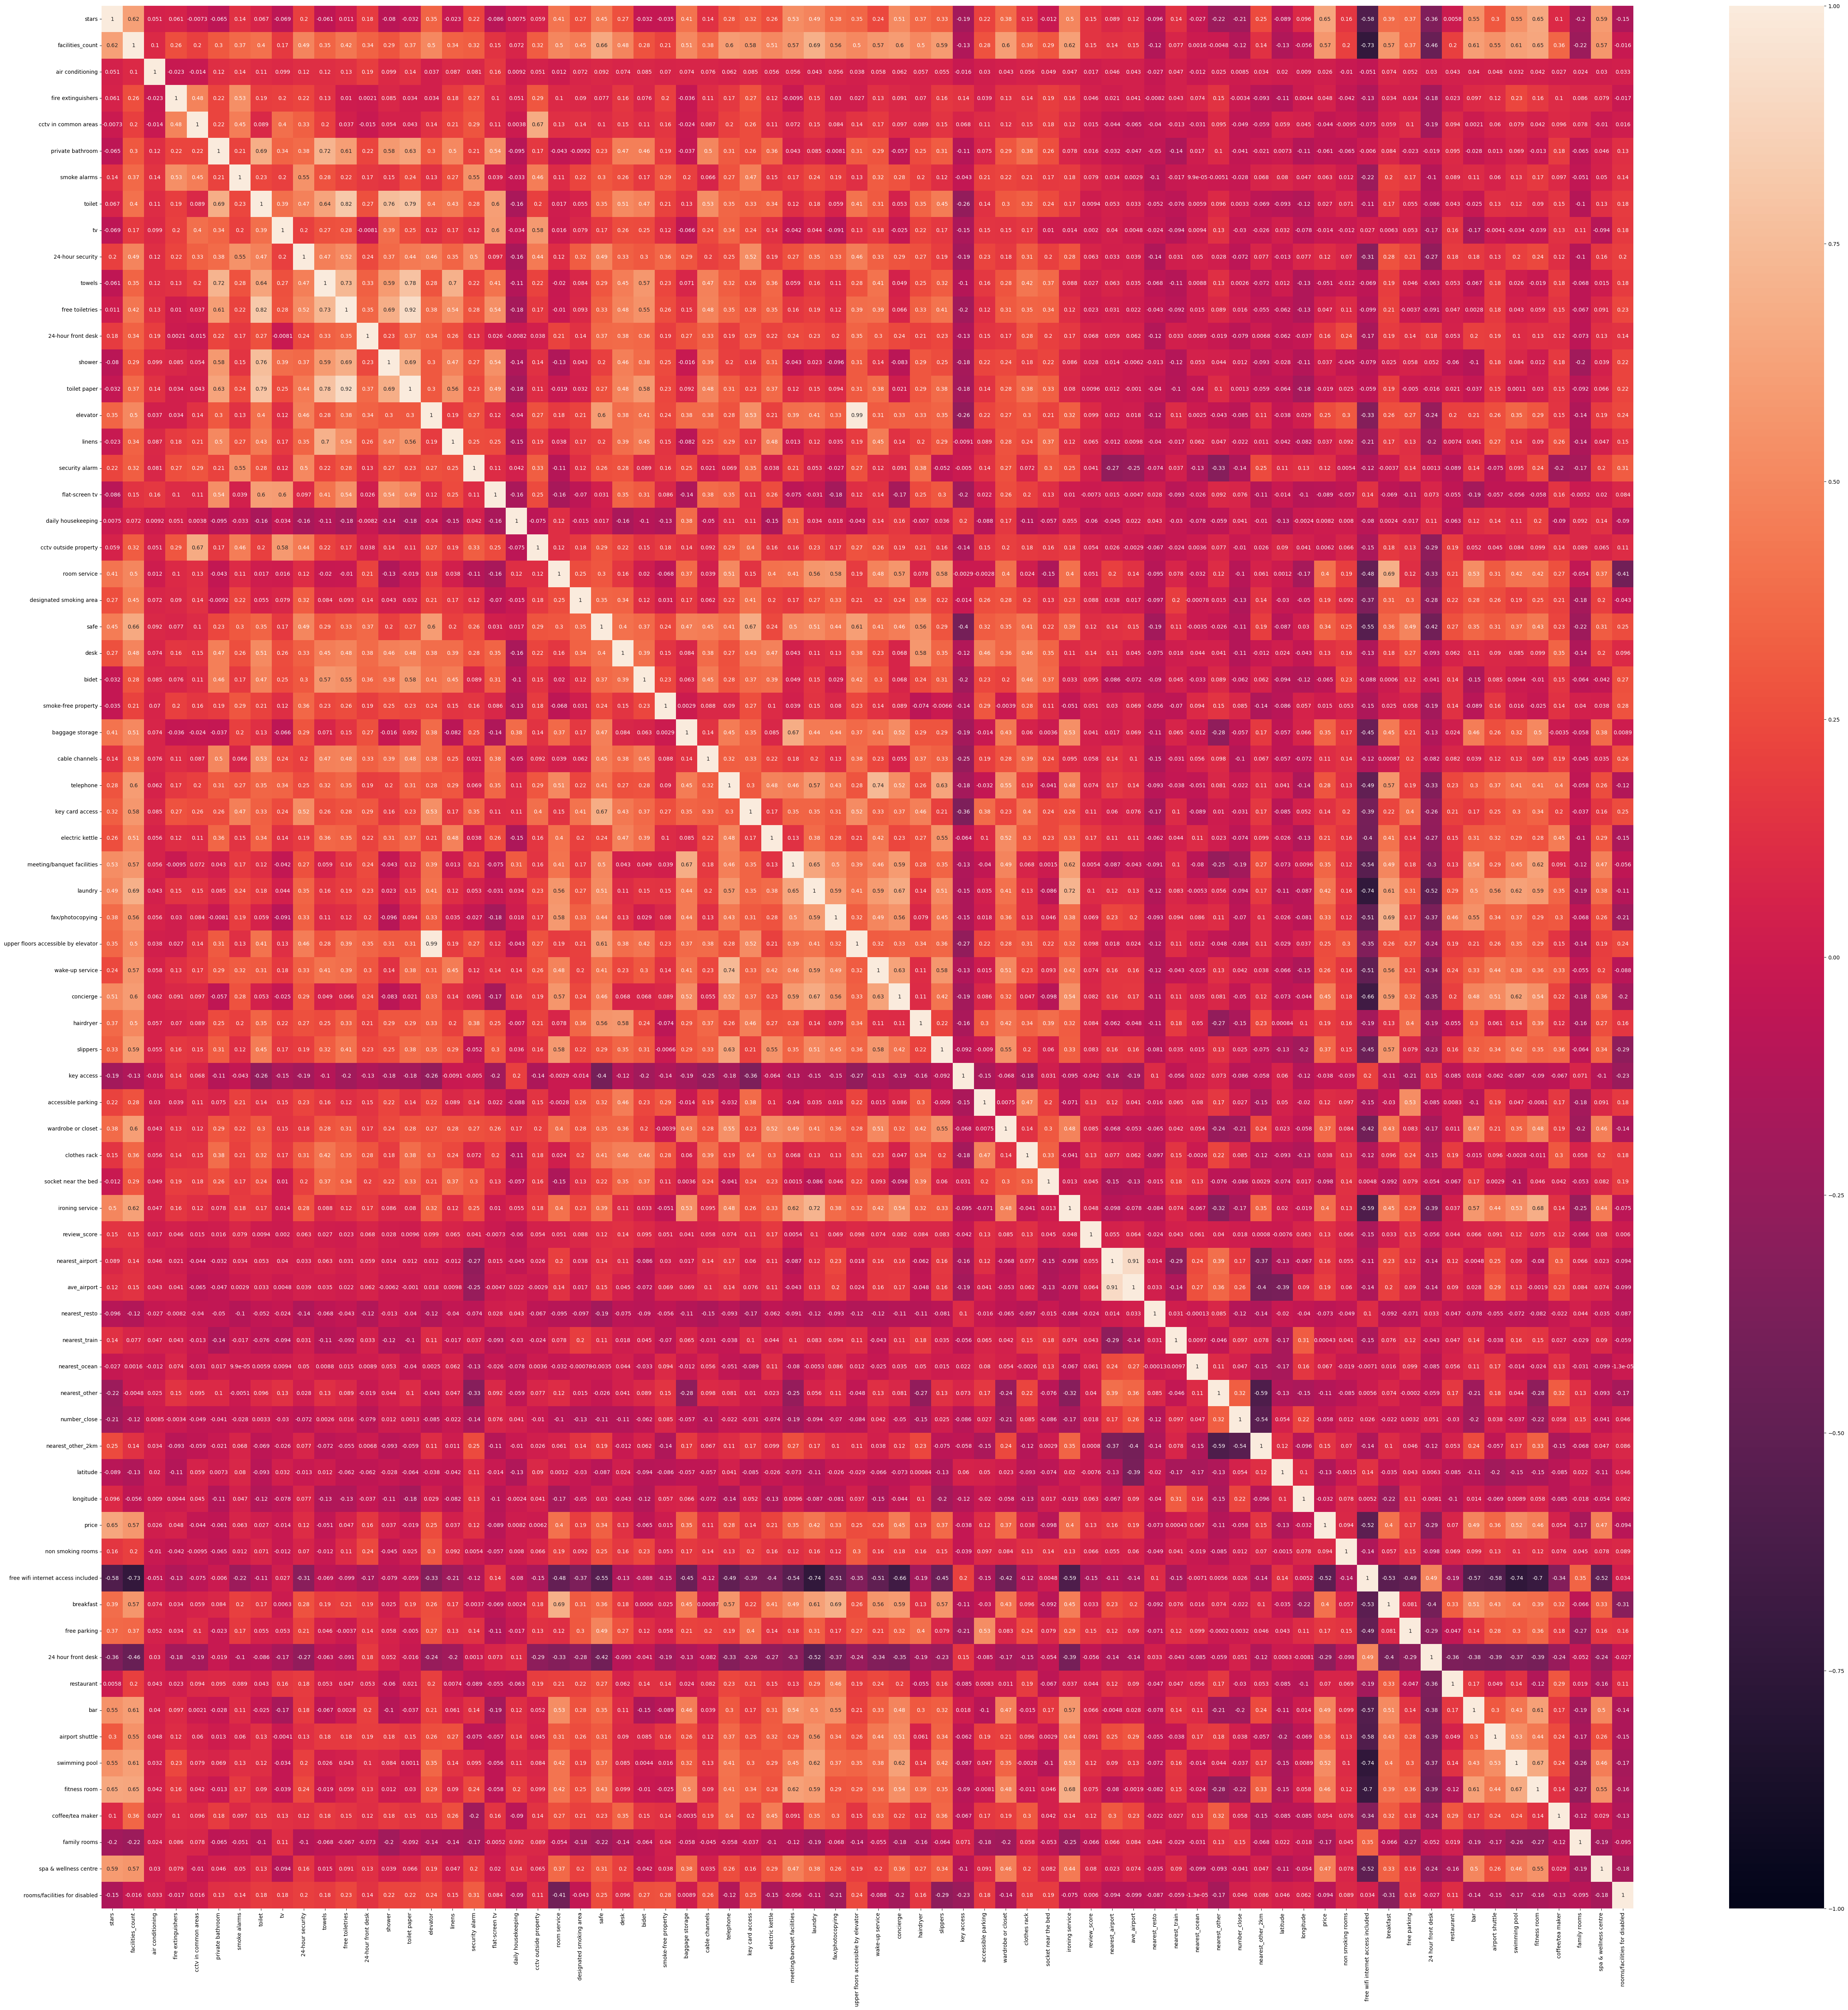

In [14]:
## heatmap to visualize correlations
plt.figure(figsize=(64, 64))
sns.heatmap(mod_data.corr(), vmin=-1, vmax=1, annot=True)

### using pycaret

In [15]:
import pycaret
from pycaret.regression import *

In [16]:
mod_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57851 entries, 1 to 76523
Data columns (total 73 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   stars                                57851 non-null  int64  
 1   facilities_count                     57851 non-null  int64  
 2   air conditioning                     57851 non-null  int64  
 3   fire extinguishers                   57851 non-null  int64  
 4   cctv in common areas                 57851 non-null  int64  
 5   private bathroom                     57851 non-null  int64  
 6   smoke alarms                         57851 non-null  int64  
 7   toilet                               57851 non-null  int64  
 8   tv                                   57851 non-null  int64  
 9   24-hour security                     57851 non-null  int64  
 10  towels                               57851 non-null  int64  
 11  free toiletries             

In [17]:
mod_data.shape

(57851, 73)

In [18]:
## setting the environment
mod_env = setup(data = mod_data, target = 'price', session_id=42,
                categorical_features = ['zip_code'],
                remove_outliers=True,
                remove_multicollinearity=True, multicollinearity_threshold=0.7 #to drop multicolinear features, keeping one
)

In [19]:
mod_env.dataset

stars  facilities_count  air conditioning  fire extinguishers  \
0          2                30                 1                   1   
1          3                12                 1                   1   
2          5                78                 1                   1   
3          4                97                 1                   1   
4          3                63                 1                   1   
...      ...               ...               ...                 ...   
57846      3                38                 1                   1   
57847      3                44                 1                   0   
57848      3                58                 1                   1   
57849      3                47                 1                   1   
57850      5                90                 1                   1   

       cctv in common areas  private bathroom  smoke alarms  toilet  tv  \
0                         1                 1             0       1   0   
1                         1                 0             1       0   0   
2                         1                 1             1       1   0   
3                         1                 1             1       1   1   
4                         1                 1             1       0   1   
...                     ...               ...           ...     ...  ..   
57846                     1                 1             1       1   1   
57847                     1                 1             1       1   1   
57848                     1                 1             1       1   1   
57849                     1                 1             1       1   0   
57850                     1                 0             1       1   1   

       24-hour security  ...  restaurant  bar  airport shuttle  swimming pool  \
0                     0  ...           0    0                1              1   
1                     0  ...           0    0                0              0   
2                     1  ...           0    1                0              1   
3                     1  ...           0    1                1              1   
4                     1  ...           1    1                0              0   
...                 ...  ...         ...  ...              ...            ...   
57846                 1  ...           0    0                0              0   
57847                 1  ...           0    0                0              0   
57848                 1  ...           1    0                1              0   
57849                 1  ...           0    0                0              0   
57850                 1  ...           0    1                1              1   

       fitness room  coffee/tea maker  family rooms  spa & wellness centre  \
0                 0                 0             0                      0   
1                 0                 0             0                      0   
2                 1                 0             0                      1   
3                 1                 1             0                      1   
4                 1                 1             0                      0   
...             ...               ...           ...                    ...   
57846             0                 0             0                      0   
57847             0                 0             0                      0   
57848             0                 0             0                      0   
57849             0                 0             0                      1   
57850             1                 0             0                      1   

       rooms/facilities for disabled   price  
0                                  0  1978.0  
1                                  0   858.0  
2                                  0  3532.0  
3                                  0  2794.0  
4                                  1  3073.0  
...                              ...     ...  
57

In [20]:
mod_env.dataset_transformed

stars  facilities_count  air conditioning  fire extinguishers  \
0        2.0              30.0               1.0                 1.0   
1        3.0              12.0               1.0                 1.0   
2        5.0              78.0               1.0                 1.0   
3        4.0              97.0               1.0                 1.0   
4        3.0              63.0               1.0                 1.0   
...      ...               ...               ...                 ...   
57846    3.0              38.0               1.0                 1.0   
57847    3.0              44.0               1.0                 0.0   
57848    3.0              58.0               1.0                 1.0   
57849    3.0              47.0               1.0                 1.0   
57850    5.0              90.0               1.0                 1.0   

       cctv in common areas  smoke alarms   tv  24-hour security  \
0                       1.0           0.0  0.0               0.0   
1                       1.0           1.0  0.0               0.0   
2                       1.0           1.0  0.0               1.0   
3                       1.0           1.0  1.0               1.0   
4                       1.0           1.0  1.0               1.0   
...                     ...           ...  ...               ...   
57846                   1.0           1.0  1.0               1.0   
57847                   1.0           1.0  1.0               1.0   
57848                   1.0           1.0  1.0               1.0   
57849                   1.0           1.0  0.0               1.0   
57850                   1.0           1.0  1.0               1.0   

       free toiletries  24-hour front desk  ...  restaurant  bar  \
0                  1.0                 1.0  ...         0.0  0.0   
1                  0.0                 1.0  ...         0.0  0.0   
2                  1.0                 1.0  ...         0.0  1.0   
3                  1.0                 1.0  ...         0.0  1.0   
4                  1.0                 1.0  ...         1.0  1.0   
...                ...                 ...  ...         ...  ...   
57846              1.0                 1.0  ...         0.0  0.0   
57847              1.0                 1.0  ...         0.0  0.0   
57848              1.0                 1.0  ...         1.0  0.0   
57849              1.0                 1.0  ...         0.0  0.0   
57850              1.0                 1.0  ...         0.0  1.0   

       airport shuttle  swimming pool  fitness room  coffee/tea maker  \
0                  1.0            1.0           0.0               0.0   
1                  0.0            0.0           0.0               0.0   
2                  0.0            1.0           1.0               0.0   
3                  1.0            1.0           1.0               1.0   
4                  0.0            0.0           1.0               1.0   
...                ...            ...           ...               ...   
57846              0.0            0.0           0.0               0.0   
57847              0.0            0.0           0.0               0.0   
57848              1.0            0.0           0.0               0.0   
57849              0.0            0.0           0.0               0.0   
57850              1.0            1.0           1.0               0.0   

       family rooms  spa & wellness centre  rooms/facilities for disabled  \
0               0.0                    0.0                            0.0   
1               0.0                    0.0                            0.0   
2               0.0                    1.0                            0.0   
3               0.0                    1.0                            0.0   
4               0.0                    0.0                            1.0   
...             ...                    ...                            ...   
57846           0.0                    0.0                            1.0   
57847          

In [21]:
best_models = compare_models()

In [22]:
# fit "best" model
mod_gbr = create_model('gbr')

In [23]:
print(mod_gbr)

GradientBoostingRegressor(random_state=42)


In [24]:
## tune the "best" model
tuned_gbr = tune_model(mod_gbr, optimize='RMSE')

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [25]:
print(tuned_gbr)

GradientBoostingRegressor(random_state=42)


In [26]:
# interpret_model(tuned_gbr) ## doesnt work for gbr

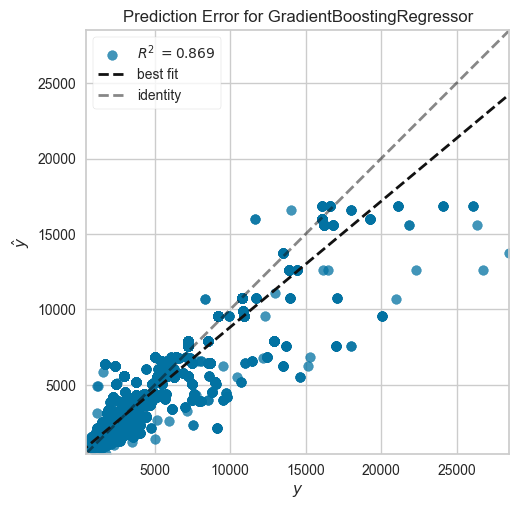

In [27]:
plot_model(mod_gbr, plot='error')

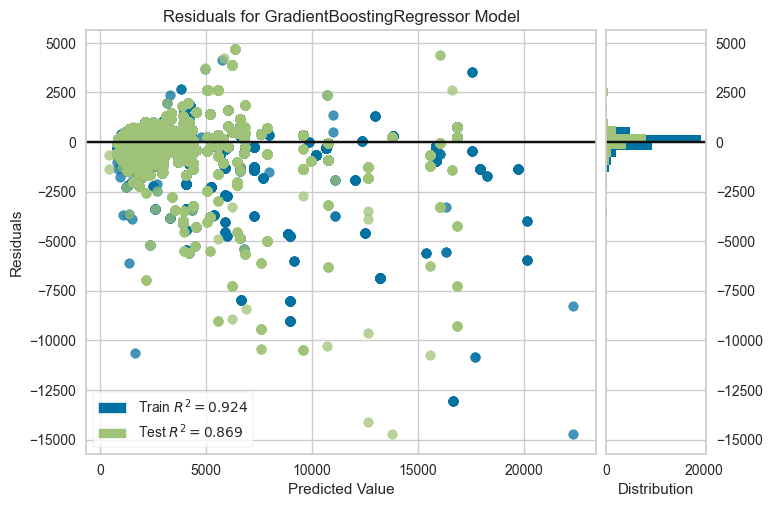

In [28]:
plot_model(mod_gbr)

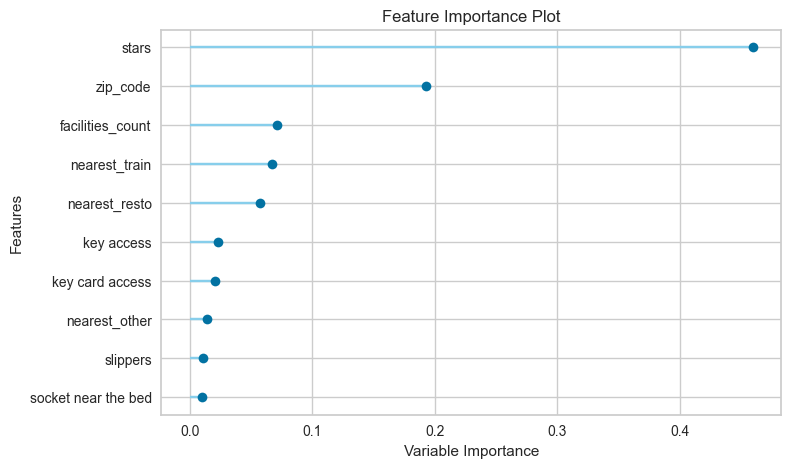

In [29]:
plot_model(mod_gbr, plot ='feature')

In [30]:
predict_model(mod_gbr)

stars  facilities_count  air conditioning  fire extinguishers  \
40495    3.0              83.0               1.0                 1.0   
40496    5.0             113.0               1.0                 0.0   
40497    3.0              35.0               1.0                 1.0   
40498    5.0              56.0               1.0                 1.0   
40499    3.0              38.0               1.0                 1.0   
...      ...               ...               ...                 ...   
57846    3.0              38.0               1.0                 1.0   
57847    3.0              44.0               1.0                 0.0   
57848    3.0              58.0               1.0                 1.0   
57849    3.0              47.0               1.0                 1.0   
57850    5.0              90.0               1.0                 1.0   

       cctv in common areas  smoke alarms   tv  24-hour security  \
40495                   1.0           1.0  1.0               1.0   
40496                   1.0           0.0  1.0               0.0   
40497                   1.0           1.0  0.0               1.0   
40498                   1.0           1.0  0.0               1.0   
40499                   1.0           1.0  1.0               1.0   
...                     ...           ...  ...               ...   
57846                   1.0           1.0  1.0               1.0   
57847                   1.0           1.0  1.0               1.0   
57848                   1.0           1.0  1.0               1.0   
57849                   1.0           1.0  0.0               1.0   
57850                   1.0           1.0  1.0               1.0   

       free toiletries  24-hour front desk  ...  bar  airport shuttle  \
40495              1.0                 0.0  ...  0.0              1.0   
40496              1.0                 1.0  ...  1.0              1.0   
40497              0.0                 1.0  ...  1.0              0.0   
40498              0.0                 1.0  ...  1.0              1.0   
40499              1.0                 1.0  ...  0.0              0.0   
...                ...                 ...  ...  ...              ...   
57846              1.0                 1.0  ...  0.0              0.0   
57847              1.0                 1.0  ...  0.0              0.0   
57848              1.0                 1.0  ...  0.0              1.0   
57849              1.0                 1.0  ...  0.0              0.0   
57850              1.0                 1.0  ...  1.0              1.0   

       swimming pool  fitness room  coffee/tea maker  family rooms  \
40495            1.0           1.0               0.0           0.0   
40496            1.0           1.0               0.0           0.0   
40497            1.0           1.0               0.0           0.0   
40498            1.0           1.0               0.0           0.0   
40499            0.0           0.0               0.0           1.0   
...              ...           ...               ...           ...   
57846            0.0           0.0               0.0           0.0   
57847            0.0           0.0               0.0           0.0   
57848            0.0           0.0               0.0           0.0   
57849            0.0           0.0               0.0           0.0   
57850            1.0           1.0               0.0           0.0   

       spa & wellness centre  rooms/facilities for disabled    price  \
40495                    0.0                            0.0   2681.0   
40496                    1.0                            0.0  18000.0   
40497                    1.0                            0.0   1976.0   
40498                    0.0                            0.0   3177.0   
40499                    0.0                            0.0   1405.0   
...                      ...                            ...      ...   
57846                    0.0                            1.0   1425.0   
57847                    0.0   

### Checking regression assumptions

If our data meets the conditions

#### Gradient Boosting Regression

- Y should be normally distributed
- No outliers

<AxesSubplot: xlabel='price', ylabel='Count'>

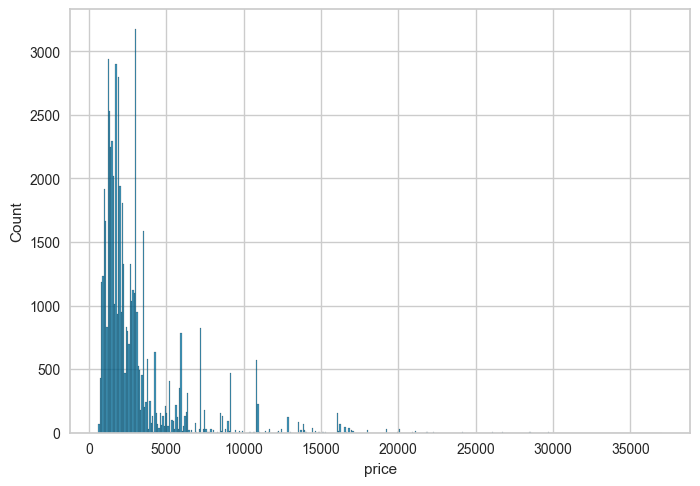

In [31]:
sns.histplot(data = mod_data, x = 'price')

#### Notes on regressions:

- [Overview-gradient boosting](https://www.smarten.com/blog/gradient-boosting-regression/)